### Regressão Linear Múltipla

Neste notebook aprenderemos como utilizar a biblioteca scikit-learn para construirmos um modelo de previsão de preço, usando regressão linear múltipla. Para isso utilizaremos um conjunto de dados de carros usados listados pelo site www.cardekho.com e disponível em: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho e adaptado neste notebook.

As informações contidas no dataset são:

**nome_carro:**        nome do carro

**ano:**               ano de fabricação

**preco_venda:**       preço que o dono quer vender

**preco_atual:**       preço da concessionária

**kms_rodados:**       kilometragem do carro 

**tipo_combustivel:**  tipo de combustível do carro (Diesel, Gasolina, GasNatural)

**tipo_vendedor:**     se o vendedor é um revendedor ou é a própria pessoa

**tipo_transmissao:**  tipo de câmbio do carro

**n_donos:**           número de donos que o carro já teve

### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando os dados

In [2]:
df = pd.read_csv("car_data.csv")

# mostrando as primeiras linhas do arquivo.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


Tamanho dos nossos registros

In [3]:
# o nosso dataset possui 301 registros de carros usados
print(df.shape)

(301, 9)


Para o algoritmo de regressão, vamos substituir os dados que possuem textos por números. 

In [4]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Vamos plotar em um gráfico os anos do carros versus o preço de venda

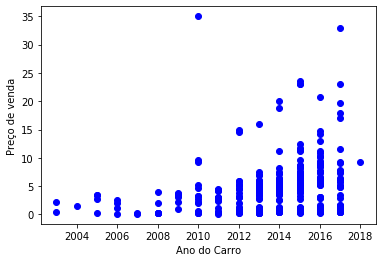

In [5]:
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

Agora vamos ver qual os anos dos carros que mais rodaram

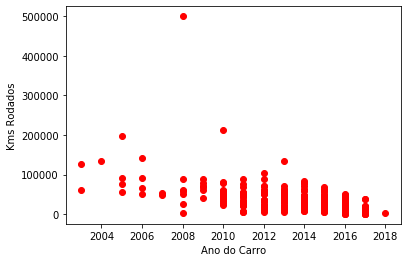

In [6]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

Separando a variável dependente e as variáveis independentes

In [19]:
# escolhendo as variáveis independentes
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]

In [20]:
# variável dependente
y = df[['preco_venda']]

### Separar dados em treino e teste

Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes. Uma para treinar o modelo
e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20%
dos dados para teste. Para isso usaremos a biblioteca train_test_split que faz essa separação automaticamente.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**x_train** é a parte usada para treinar o algoritmo

**x_test** é a parte usada para testar o algoritmo depois de treinado

**y_train** é a parte das respostas usadas no treino

**y_test** é a parte das respostas usadas para testar o algoritmo

In [22]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


### Treinando o Modelo

In [23]:
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Realiza a previsão dos preços

In [24]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = model.predict(x_test)

In [25]:
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


Agora vamos plotar o preço dos carros, previsto pelo modelo versus os dados de teste

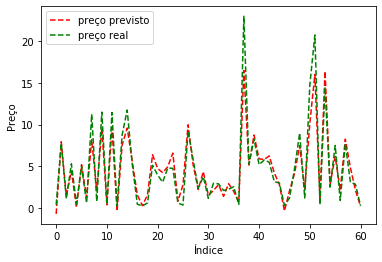

In [26]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

É possível observar no gráfico que o modelo, em alguns casos tende a prever preços mais baixos do que o preço real de venda.

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente,
iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta
na etapa de teste e os dados de resposta previstos.

In [27]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8968979297420616


Quanto mais próximo de 1, mais o modelo é capaz de prever corretamente.
Então do resultado acima, colocando em porcentagem podemos dizer que o nosso modelo
prevê corretamente 87% dos preços.

### Agora é sua vez de Praticar

Use as variáveis a seguir para fazer as previsões com base no que já foi visto

In [28]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

Separe os dados em dados de treino e teste, e então defina um modelo de regressão e realize as previsões.
depois use o r2_score para saber a nova porcentagem desse modelo. Oresultado é melhor ou pior?

O resultado e pior, pois utiliza-se menos variaveis independentes para prever a variavel dependente e com isso temos uma menor precisao. Mudando a porcentagem de treino e teste tambem obteremos resultados diferentes.

In [121]:
# escreva seu código aqui
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.5) #Alterando as porcentagens podemos ter valores que variam de 48%(Visto testando o codigo com 10% de teste) a 86%
model = LinearRegression()
model.fit(x_train, y_train)
new_y_pred = model.predict(x_test)
print('R2-score: ', r2_score(y_test, new_y_pred))

R2-score:  0.8675168307942513


## Solução

In [83]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2)

model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

new_y_pred = model.predict(x_test)

print('R2-score: ', r2_score(y_test, new_y_pred))

R2-score:  0.798389835321323


colocando em porcentagem podemos dizer que o nosso modelo prevê corretamente 59% dos preços, esse
resultado é pior do que quando se utilizou mais variáveis para prever.